Date -24 Jan 2024

AI Lab

Mr. Abhishek Raj

Assignment 4

Logistic Regression

In this assignment, you need to classify the given dataset using logistic regression.

Database

Independent/Predictor Variable -
https://drive.google.com/file/d/1eEBjqnIMlViYOwoOBqZ11tMbn9cZLLEo/view?usp=drive_link

Dependent/Response Variable -
https://drive.google.com/file/d/1hnowuwHw_qgRl1a0LLa6y0eItyMU_lZ0/view?usp=drive_link

Use the same cost function that we had discussed in class.
Answer the following questions based on your observations
1. Use logistic regression to find decision boundary For the given database. Set your learning rate to 0.1. What is the cost function value and learning parameter value after convergence?
2. Plot cost function v/s iteration graph for the model trained in question 1. Plot the line as shown here - https://pythonguides.com/matplotlib-plot-a-line/#Matplotlib_plot_a_line_chart Do not use scatter plots for this.
3. Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you obtained in question 1. Do not use scatter plot.
4. Train your model with a learning rate of 0.1 and 5. Plot the cost-function v/s iteration curve for both learning rates on
the same graph. For this task, only train your model for 100 iterations.
5. Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall, F1-score.
Note
1. Use batch gradient descent unless mentioned in the question.
2. Your code should be in Python.
3. You are required to implement the model yourself. You are not allowed to use libraries like sci-kit learn, Tensorflow, Pytorch, etc, and use their built-in models.
4. You may use libraries like numpy, pandas, matplotlib, etc to read and manipulate the dataset and plot the graphs.
5. Your plots should be labelled properly.
6. Normalize your independent variables befores training.
How to Submit?
1. You need to submit a single PDF report file and the name of that file should be your roll numbers.
2. Your report should have answers to all the questions with the plots. Upload your code on github and mention the link in the report. Do not copy paste code in the report.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load
#independent/predictor variable (X)
X=pd.read_csv('logisticX.csv',header=None)
X=X.values

In [ ]:
#deependent/response variable (Y)
Y=pd.read_csv('logisticY.csv', header=None)
Y=Y.values
Y=Y.reshape(-1,1)

In [ ]:
#normalize the independent variables
def normalize(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_normalized=(X-mean)/std
    return X_normalized,mean,std

X_normalized,X_mean,X_std=normalize(X)

#aadd a column of ones to X for the bias term
X_normalized=np.hstack((np.ones((X_normalized.shape[0],1)),X_normalized))

In [ ]:
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
#cost function for logistic regression
def compute_cost(X,Y,theta):
    m=len(Y)
    h=sigmoid(np.dot(X,theta))
    cost=(-1/m)*np.sum(Y*np.log(h)+(1-Y)*np.log(1-h))
    return cost

In [ ]:
#gradient descent function
def gradient_descent(X,Y,theta,learning_rate,num_iterations):
    m=len(Y)
    cost_history=[]

    for i in range(num_iterations):
        h=sigmoid(np.dot(X,theta))
        gradient=np.dot(X.T,(h-Y))/m
        theta-=learning_rate*gradient
        cost=compute_cost(X,Y,theta)
        cost_history.append(cost)

    return theta,cost_history

In [ ]:
#initialize parameters
theta=np.zeros((X_normalized.shape[1],1))

In [ ]:
#seting learning rate and number of iterations
learning_rate=0.1
num_iterations=1000

In [ ]:
#ytrain
theta,cost_history=gradient_descent(X_normalized,Y,theta,learning_rate,num_iterations)

In [ ]:
#Question 1: Cost function value and learning parameter value after convergence
print("Cost function value after convergence:",cost_history[-1])
print("Learning parameter values after convergence:",theta.flatten())

Cost function value after convergence: 0.2291057867949178
Learning parameter values after convergence: [ 0.32395465  2.38613663 -2.49462467]


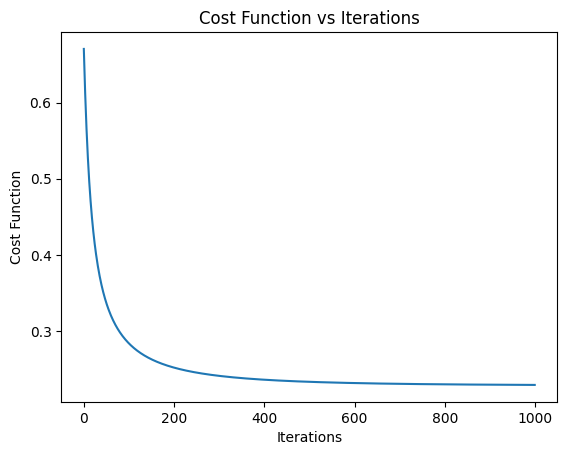

In [ ]:
#Question 2: Plot cost function vs iteration graph
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations')
plt.show()

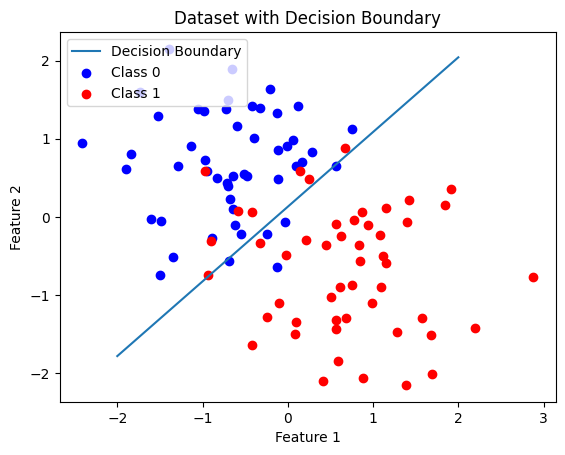

In [ ]:
#Question 3: Plot the dataset and decision boundary
#decision boundary: theta0 + theta1*x1 + theta2*x2 = 0

x1_values=np.linspace(-2,2,100)
x2_values=-(theta[0]+theta[1]*x1_values)/theta[2]

plt.plot(x1_values,x2_values,label='Decision Boundary')
plt.scatter(X_normalized[Y[:,0]==0,1],X_normalized[Y[:,0]==0,2],color='blue',label='Class 0')
plt.scatter(X_normalized[Y[:,0]==1,1],X_normalized[Y[:,0]==1,2],color='red',label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.legend()
plt.show()

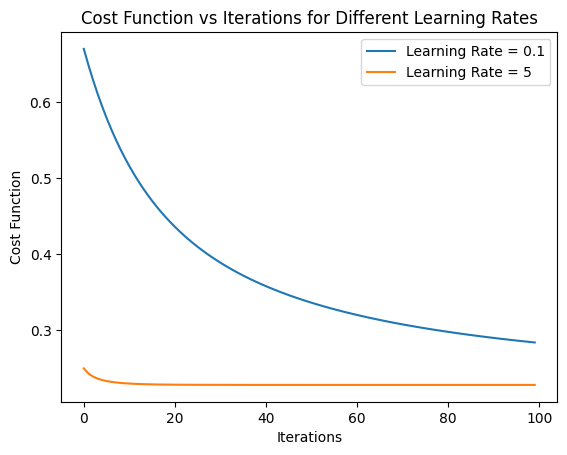

In [ ]:
#Question 4: Train model with learning rates 0.1 and 5, plot cost function vs iteration
theta_lr01,cost_history_lr01=gradient_descent(X_normalized,Y,np.zeros((X_normalized.shape[1], 1)),0.1,100)
theta_lr5,cost_history_lr5=gradient_descent(X_normalized,Y,np.zeros((X_normalized.shape[1],1)),5,100)

plt.plot(cost_history_lr01,label='Learning Rate = 0.1')
plt.plot(cost_history_lr5,label='Learning Rate = 5')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.legend()
plt.show()

In [ ]:
#Question 5: Confusion matrix and performance metrics
def predict(X,theta):
    return (sigmoid(np.dot(X,theta))>=0.5).astype(int)

Y_pred=predict(X_normalized,theta)

#confusion matrix
def confusion_matrix(Y_true,Y_pred):
    TP=np.sum((Y_true==1)&(Y_pred==1))
    TN=np.sum((Y_true==0)&(Y_pred==0))
    FP=np.sum((Y_true==0)&(Y_pred==1))
    FN=np.sum((Y_true==1)&(Y_pred==0))
    return np.array([[TN,FP],[FN,TP]])

conf_matrix=confusion_matrix(Y,Y_pred)
print("Confusion Matrix:\n",conf_matrix)

Confusion Matrix:
 [[45  5]
 [ 8 42]]


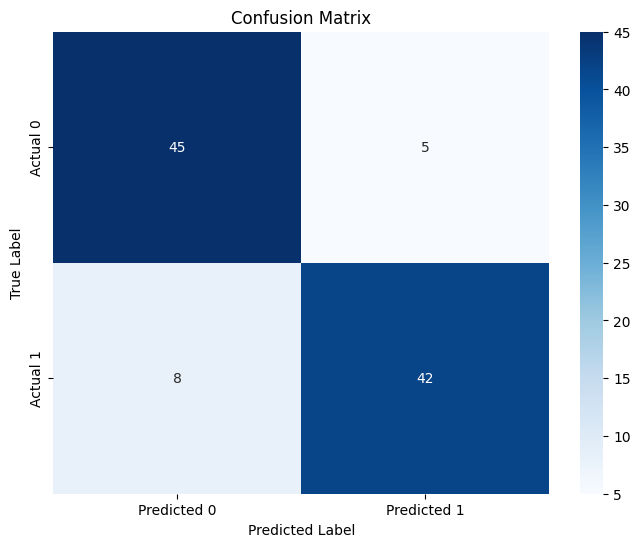

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Accuracy, Precision, Recall, F1-Score
def performance_metrics(conf_matrix):
    TN,FP,FN,TP=conf_matrix.ravel()
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1_score=2*(precision*recall)/(precision+recall)
    return accuracy, precision, recall, f1_score

accuracy,precision,recall,f1_score=performance_metrics(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1-Score: 0.8659793814432989
